In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "pristine-flames-422615-m1"
dataset_name = "ima_dataset"
table_names = ["restaurant_data", "restaurant_tips", "restaurant_checkin"] # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.restaurant_data`
    ORDER BY business_id
"""

query_job_data = bigquery_client.query(query)
results = query_job_data.result()

restaurant_data_df = query_job_data.to_dataframe()
restaurant_data_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,None,None,False,None,None,<NA>,None,True,False,True
1,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,None,None,False,None,None,<NA>,None,True,False,True
2,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,None,None,False,None,None,<NA>,None,True,False,True
3,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,...,None,None,False,None,None,<NA>,None,True,False,True
4,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,14,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209139,zzu6_r3DxBJuXcjnOYVdTw,Cafe Diblasi,"1801 Stumpf Blvd, Ste 4",Gretna,LA,70056,29.911358,-90.035558,3.5,8,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,False
209140,zzyx5x0Z7xXWWvWnZFuxlQ,Walnut Street Pizza,200 S Broad St,Philadelphia,PA,19102,39.949183,-75.164777,2.5,6,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True
209141,zzyx5x0Z7xXWWvWnZFuxlQ,Walnut Street Pizza,200 S Broad St,Philadelphia,PA,19102,39.949183,-75.164777,2.5,6,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True
209142,zzyx5x0Z7xXWWvWnZFuxlQ,Walnut Street Pizza,200 S Broad St,Philadelphia,PA,19102,39.949183,-75.164777,2.5,6,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True


In [ ]:
restaurant_data_df.duplicated(subset=['business_id']).sum()

156858

In [ ]:
restaurant_data_df_clean = restaurant_data_df.drop_duplicates(subset=['business_id'], keep='first')

In [ ]:
restaurant_data_df_clean['business_id'].isnull().sum()

0

In [ ]:
restaurant_data_df_clean.dtypes

business_id        object
name               object
address            object
city               object
state              object
                   ...   
GoodForDancing    boolean
BestNights         object
BYOB              boolean
Corkage           boolean
Parking           boolean
Length: 777, dtype: object

In [ ]:
restaurant_category = restaurant_data_df_clean.iloc[:, :14]
restaurant_category = restaurant_category.drop(['attributes','hours'], axis =1)
restaurant_category.isnull().sum()

business_id       0
name              0
address         443
city              0
state             0
postal_code      21
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
categories        0
dtype: int64

In [ ]:
restaurant_category

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"Seafood, Restaurants, Latin American, Food, Fo..."
4,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,08021,39.817850,-74.993364,3.0,14,1,"Food, Restaurants, Specialty Food, Mexican, Et..."
8,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,9910 108A Avenue,Edmonton,AB,T5H,53.554659,-113.493040,2.0,12,0,"Breakfast & Brunch, Restaurants"
12,--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,70122,30.006341,-90.074523,3.0,27,0,"Food, Restaurants, Italian"
16,--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,1531 W Wynnewood Rd,Ardmore,PA,19003,39.997299,-75.292207,4.5,32,0,"American (Traditional), Restaurants, Pizza, Sa..."
...,...,...,...,...,...,...,...,...,...,...,...,...
209124,zzjFdJwXuxBOGe9JeY_EMw,Taste of the Islands,1500 Powell St,Norristown,PA,19401,40.125572,-75.333395,4.0,47,1,"Caribbean, Restaurants"
209128,zznJox6-nmXlGYNWgTDwQQ,Dunkin',23924 US Highway 19 N,Clearwater,FL,33765,27.990058,-82.730226,1.5,30,1,"Food, Restaurants, Coffee & Tea, Donuts"
209132,zznZqH9CiAznbkV6fXyHWA,Que Pasta Nola,500 S Telemachus St,New Orleans,LA,70119,29.968303,-90.099917,5.0,12,1,"Pop-Up Restaurants, Cuban, Restaurants, Honduran"
209136,zzu6_r3DxBJuXcjnOYVdTw,Cafe Diblasi,"1801 Stumpf Blvd, Ste 4",Gretna,LA,70056,29.911358,-90.035558,3.5,8,0,"Restaurants, Cafes, Italian"


In [ ]:
restaurant_keywords = [
    "bars",
    "beach bars",
    "beer bar",
    "beer gardens",
    "breweries",
    "brewpubs",
    "champagne bars",
    "cigar bars",
    "cocktail bars",
    "dinner theater",
    "dive bars",
    "drive-thru bars",
    "gay bars",
    "hookah bars",
    "irish pub",
    "jazz & blues",
    "juice bars & smoothies",
    "lounges",
    "music venues",
    "nightlife",
    "piano bars",
    "pubs",
    "speakeasies",
    "sports bars",
    "sushi bars",
    "tapas bars",
    "tiki bars",
    "whiskey bars",
    "wine bars",
    "wine tasting room",
    "wineries"
]

# 函数：从 `category` 中挑选与餐饮类相关的标签
def filter_restaurant_tags(categories):
    # 预处理并拆分标签
    tags = [tag.strip().lower() for tag in categories.split(', ')]
    # 筛选匹配的餐饮标签
    filtered_tags = [tag for tag in tags if any(keyword in tag for keyword in restaurant_keywords)]
    # 重新组合成字符串
    return ', '.join(filtered_tags)

# 应用过滤函数，提取与餐饮相关的标签
restaurant_category['filtered_category'] = restaurant_category['categories'].apply(filter_restaurant_tags)

# 删除空的 `filtered_category` 列
restaurant_category_bar = restaurant_category[restaurant_category['filtered_category'] != '']

restaurant_category_bar


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,filtered_category
56,-0M0b-XhtFagyLmsBtOe8w,Paris Wine Bar,2303 Fairmount Ave,Philadelphia,PA,19130,39.967439,-75.175452,3.5,18,0,"Bars, Nightlife, Restaurants, French, Wine Bars","bars, nightlife, wine bars"
64,-0TffRSXXIlBYVbb5AwfTg,IndeBlue Modern Indian Food & Spirits,205 South 13th St,Philadelphia,PA,19107,39.948508,-75.161969,4.5,1097,1,"Cocktail Bars, Food Delivery Services, Nightli...","cocktail bars, nightlife, bars"
68,-0__F9fnKt8uioCKztF5Ww,Piscobar,914 Union St,New Orleans,LA,70112,29.951696,-90.073235,4.0,66,1,"Cafes, Nightlife, Cocktail Bars, Peruvian, Res...","nightlife, cocktail bars, bars"
84,-0gWtMKg8_iV6vC5wRFDiA,McQ's Pub & Eatery,3149 E Thompson Rd,Indianapolis,IN,46227,39.692811,-86.109775,3.0,14,0,"Restaurants, Nightlife, Bars, Pubs","nightlife, bars, pubs"
120,-1MhPXk1FglglUAmuPLIGg,Red Garter Saloon,3143 E Speedway Blvd,Tucson,AZ,85716,32.236361,-110.925213,4.0,107,1,"Nightlife, Burgers, Sports Bars, Bars, Restaur...","nightlife, sports bars, bars, dive bars"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209064,zyHP-oXgDkANEyQbJVKf8g,The Urban Juicer,2206 8th Ave S,Nashville,TN,37204,36.129826,-86.778134,4.0,124,1,"Food, Juice Bars & Smoothies, Restaurants, Aca...",juice bars & smoothies
209072,zyPz0xvE5XkeCVH2J7g2gw,Von Elrod's Beer Hall & Kitchen,1004 4th Ave N,Nashville,TN,37219,36.173749,-86.784954,3.5,280,1,"Pretzels, Barbeque, American (New), Hot Dogs, ...","nightlife, bars, beer gardens"
209076,zymvTQ12tRy3bzmP4tPgOg,Salt + Smoke,501 S Main St,Saint Charles,MO,63301,38.777849,-90.483287,4.0,368,1,"Beer Bar, Sandwiches, Bars, Barbeque, Restaura...","beer bar, bars, nightlife"
209096,zzHtFjfM7NvuVM1HTsCLGA,Nom Nom Japanese Kitchen,35 W Lancaster Ave,Paoli,PA,19301,40.042065,-75.485834,4.5,35,0,"Sushi Bars, Ramen, Restaurants, Japanese",sushi bars


In [ ]:
restaurant_category_bar['categories_split'] = restaurant_category_bar['filtered_category'].str.split(', ')

df_exploded = restaurant_category_bar.explode('categories_split')
df_exploded = df_exploded.rename(columns={'categories_split': 'category'})
df_exploded = df_exploded.drop(['categories', 'filtered_category'], axis =1)
df_exploded

<ipython-input-13-51b40025882c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_category_bar['categories_split'] = restaurant_category_bar['filtered_category'].str.split(', ')


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category
56,-0M0b-XhtFagyLmsBtOe8w,Paris Wine Bar,2303 Fairmount Ave,Philadelphia,PA,19130,39.967439,-75.175452,3.5,18,0,bars
56,-0M0b-XhtFagyLmsBtOe8w,Paris Wine Bar,2303 Fairmount Ave,Philadelphia,PA,19130,39.967439,-75.175452,3.5,18,0,nightlife
56,-0M0b-XhtFagyLmsBtOe8w,Paris Wine Bar,2303 Fairmount Ave,Philadelphia,PA,19130,39.967439,-75.175452,3.5,18,0,wine bars
64,-0TffRSXXIlBYVbb5AwfTg,IndeBlue Modern Indian Food & Spirits,205 South 13th St,Philadelphia,PA,19107,39.948508,-75.161969,4.5,1097,1,cocktail bars
64,-0TffRSXXIlBYVbb5AwfTg,IndeBlue Modern Indian Food & Spirits,205 South 13th St,Philadelphia,PA,19107,39.948508,-75.161969,4.5,1097,1,nightlife
...,...,...,...,...,...,...,...,...,...,...,...,...
209076,zymvTQ12tRy3bzmP4tPgOg,Salt + Smoke,501 S Main St,Saint Charles,MO,63301,38.777849,-90.483287,4.0,368,1,bars
209076,zymvTQ12tRy3bzmP4tPgOg,Salt + Smoke,501 S Main St,Saint Charles,MO,63301,38.777849,-90.483287,4.0,368,1,nightlife
209096,zzHtFjfM7NvuVM1HTsCLGA,Nom Nom Japanese Kitchen,35 W Lancaster Ave,Paoli,PA,19301,40.042065,-75.485834,4.5,35,0,sushi bars
209112,zzbZtgPYZS8sTIWQH6DwEw,F & M Patio Bar,4841 Tchoupitoulas St,New Orleans,LA,70115,29.916857,-90.106974,3.0,86,1,nightlife


In [ ]:
import pandas as pd
category_dummies = pd.get_dummies(df_exploded['category'])

# 将这些热编码列添加到原始 DataFrame
df_encoded = pd.concat([df_exploded, category_dummies], axis=1)

# 对所有的热编码列以及其他需要保留的数值列进行聚合
# 这里假设其他的列你可能想要保留的是 'stars', 'review_count' 等
df_grouped = df_encoded.groupby('business_id').agg({
    'name': 'first',  # 假设所有同一business_id的名称相同，取第一个
    'address': 'first',
    'city': 'first',
    'state': 'first',
    'postal_code': 'first',
    'latitude': 'mean',  # 可能会有细微的不同，取均值
    'longitude': 'mean',
    'stars': 'mean',
    'review_count': 'sum',  # 评论数可以加总
    'is_open': 'max',  # 如果有多个记录，只要有一个表示开放，则视为开放
}).join(category_dummies.groupby(df_exploded['business_id']).sum())

# 查看结果
df_grouped

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,pubs,speakeasies,sports bars,sushi bars,tapas bars,tiki bars,whiskey bars,wine bars,wine tasting room,wineries
business_id,,,,,,,,,,,,,,,,,,,,,
-0M0b-XhtFagyLmsBtOe8w,Paris Wine Bar,2303 Fairmount Ave,Philadelphia,PA,19130,39.967439,-75.175452,3.5,54,0,...,0,0,0,0,0,0,0,1,0,0
-0TffRSXXIlBYVbb5AwfTg,IndeBlue Modern Indian Food & Spirits,205 South 13th St,Philadelphia,PA,19107,39.948508,-75.161969,4.5,3291,1,...,0,0,0,0,0,0,0,0,0,0
-0__F9fnKt8uioCKztF5Ww,Piscobar,914 Union St,New Orleans,LA,70112,29.951696,-90.073235,4.0,198,1,...,0,0,0,0,0,0,0,0,0,0
-0gWtMKg8_iV6vC5wRFDiA,McQ's Pub & Eatery,3149 E Thompson Rd,Indianapolis,IN,46227,39.692811,-86.109775,3.0,42,0,...,1,0,0,0,0,0,0,0,0,0
-1MhPXk1FglglUAmuPLIGg,Red Garter Saloon,3143 E Speedway Blvd,Tucson,AZ,85716,32.236361,-110.925213,4.0,428,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zyHP-oXgDkANEyQbJVKf8g,The Urban Juicer,2206 8th Ave S,Nashville,TN,37204,36.129826,-86.778134,4.0,124,1,...,0,0,0,0,0,0,0,0,0,0
zyPz0xvE5XkeCVH2J7g2gw,Von Elrod's Beer Hall & Kitchen,1004 4th Ave N,Nashville,TN,37219,36.173749,-86.784953,3.5,840,1,...,0,0,0,0,0,0,0,0,0,0
zymvTQ12tRy3bzmP4tPgOg,Salt + Smoke,501 S Main St,Saint Charles,MO,63301,38.777849,-90.483287,4.0,1104,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.restaurant_tips`
    ORDER BY business_id
"""

query_job_tips = bigquery_client.query(query)
results = query_job_tips.result()

restaurant_tips_df = query_job_tips.to_dataframe()
restaurant_tips_df.head()

,user_id,business_id,text,date,compliment_count
0,zmgsdGzOp08BWJZ2yrOKww,---kPU91CF4Lq2-WlRu9Lw,Awesome raw bar /fish shack. Exactly how I liv...,2021-12-03 18:35:53+00:00,0
1,VjvrRYcqu34DyBns0R11bg,---kPU91CF4Lq2-WlRu9Lw,Excellent,2021-01-12 23:10:44+00:00,0
2,VjvrRYcqu34DyBns0R11bg,---kPU91CF4Lq2-WlRu9Lw,Great place! Excellent Food!,2021-03-30 03:53:21+00:00,0
3,St3aCytjxiMN-5OvFvcgSw,---kPU91CF4Lq2-WlRu9Lw,Great food & service!! Crab cakes were excelle...,2021-09-23 16:58:31+00:00,0
4,zmgsdGzOp08BWJZ2yrOKww,---kPU91CF4Lq2-WlRu9Lw,Awesome raw bar /fish shack. Exactly how I liv...,2021-12-03 18:35:53+00:00,0


In [ ]:
restaurant_tips_df.duplicated().sum()

649229

In [ ]:
restaurant_tips_df_clean = restaurant_tips_df.drop_duplicates()

In [ ]:
restaurant_tips_df_clean.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [ ]:
aggregated_reviews = restaurant_tips_df_clean.groupby('business_id').agg({
    'user_id': 'nunique',  # 计算唯一的用户数量
    'text': ' '.join,  # 合并所有评论到一个字符串
    'compliment_count': 'sum',  # 累加赞美次数
    'date': 'max'  # 获取最近的评论日期
}).reset_index()

# 重命名列以提高可读性
aggregated_reviews.columns = ['business_id', 'user_count', 'aggregated_text', 'total_compliments', 'latest_review_date']
aggregated_reviews

,business_id,user_count,aggregated_text,total_compliments,latest_review_date
0,---kPU91CF4Lq2-WlRu9Lw,3,Awesome raw bar /fish shack. Exactly how I liv...,0,2021-12-03 18:35:53+00:00
1,--0iUa4sNDFiZFrAdIWhZQ,5,No AC here but taking out. Fresh authentic and...,0,2014-07-08 01:00:55+00:00
2,--7PUidqRWpRSpXebiyxTg,3,Chunky hashbrowns :) first time to dine here b...,0,2015-09-27 13:26:08+00:00
3,--8IbOsAAxjKRoYsBFL-PA,4,Welcome to the neighborhood! Super sweet staff...,0,2016-05-19 01:44:17+00:00
4,--ZVrH2X2QXBFdCilbirsw,7,Don't ask for long hots... they don't make or ...,0,2017-07-03 13:18:40+00:00
...,...,...,...,...,...
46784,zziDpuuJw-Km1J4BaGpBKA,2,Great lunch Giving the Tavern Club a try...,1,2014-04-09 04:54:15+00:00
46785,zzjFdJwXuxBOGe9JeY_EMw,2,"Food was great & priced well Fast, tasty and d...",0,2019-04-20 11:12:24+00:00
46786,zznJox6-nmXlGYNWgTDwQQ,6,No longer at this location. The rudest drive t...,0,2020-08-22 14:46:49+00:00
46787,zzu6_r3DxBJuXcjnOYVdTw,2,Great little Italian establishment!! Good for ...,0,2013-04-14 14:25:38+00:00


In [ ]:
merged_df_bar = pd.merge(df_grouped, aggregated_reviews, on='business_id', how='left')

merged_df_bar

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,tapas bars,tiki bars,whiskey bars,wine bars,wine tasting room,wineries,user_count,aggregated_text,total_compliments,latest_review_date
0,-0M0b-XhtFagyLmsBtOe8w,Paris Wine Bar,2303 Fairmount Ave,Philadelphia,PA,19130,39.967439,-75.175452,3.5,54,...,0,0,0,1,0,0,1.0,come for the local wines on tap and live jazz,0,2012-02-09 22:16:47+00:00
1,-0TffRSXXIlBYVbb5AwfTg,IndeBlue Modern Indian Food & Spirits,205 South 13th St,Philadelphia,PA,19107,39.948508,-75.161969,4.5,3291,...,0,0,0,0,0,0,85.0,love the food....can't stand the forks & spoon...,2,2021-12-13 00:00:33+00:00
2,-0__F9fnKt8uioCKztF5Ww,Piscobar,914 Union St,New Orleans,LA,70112,29.951696,-90.073235,4.0,198,...,0,0,0,0,0,0,7.0,Upstairs bar closed Monday and Tuesday Cool ba...,0,2018-01-06 05:02:27+00:00
3,-0gWtMKg8_iV6vC5wRFDiA,McQ's Pub & Eatery,3149 E Thompson Rd,Indianapolis,IN,46227,39.692811,-86.109775,3.0,42,...,0,0,0,0,0,0,2.0,Wanted to see my Alyssa Get the Moe Moe fries!...,0,2013-03-29 17:27:16+00:00
4,-1MhPXk1FglglUAmuPLIGg,Red Garter Saloon,3143 E Speedway Blvd,Tucson,AZ,85716,32.236361,-110.925213,4.0,428,...,0,0,0,0,0,0,16.0,Solid tater tots. Never had anything like them...,0,2021-09-17 03:36:30+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11576,zyHP-oXgDkANEyQbJVKf8g,The Urban Juicer,2206 8th Ave S,Nashville,TN,37204,36.129826,-86.778134,4.0,124,...,0,0,0,0,0,0,19.0,Wi-Fi available here! Great atmosphere! Feels ...,0,2020-07-14 03:44:52+00:00
11577,zyPz0xvE5XkeCVH2J7g2gw,Von Elrod's Beer Hall & Kitchen,1004 4th Ave N,Nashville,TN,37219,36.173749,-86.784953,3.5,840,...,0,0,0,0,0,0,19.0,pickled fried green tomatoes! Best sausage in ...,0,2021-12-23 02:48:34+00:00
11578,zymvTQ12tRy3bzmP4tPgOg,Salt + Smoke,501 S Main St,Saint Charles,MO,63301,38.777849,-90.483287,4.0,1104,...,0,0,0,0,0,0,22.0,Patio is closed for food during colder weather...,0,2021-11-23 00:40:38+00:00
11579,zzHtFjfM7NvuVM1HTsCLGA,Nom Nom Japanese Kitchen,35 W Lancaster Ave,Paoli,PA,19301,40.042065,-75.485834,4.5,35,...,0,0,0,0,0,0,3.0,They were just opened. We got noodles soup. It...,0,2020-02-17 22:01:59+00:00


In [ ]:
merged_df_regional.isnull().sum()

business_id                 0
name                        0
address                    14
city                        0
state                       0
postal_code                 0
latitude                    0
longitude                   0
stars                       0
review_count                0
is_open                     0
airport lounges             0
bars                        0
beach bars                  0
beer bar                    0
beer gardens                0
breweries                   0
brewpubs                    0
champagne bars              0
cigar bars                  0
cocktail bars               0
dinner theater              0
dive bars                   0
drive-thru bars             0
gastropubs                  0
gay bars                    0
hookah bars                 0
irish pub                   0
jazz & blues                0
juice bars & smoothies      0
lounges                     0
music venues                0
nightlife                   0
piano bars

In [ ]:
cleaned_df_bar = merged_df_bar.dropna(subset=['aggregated_text'])
cleaned_df_bar.isnull().sum()

business_id                0
name                       0
address                   10
city                       0
state                      0
postal_code                0
latitude                   0
longitude                  0
stars                      0
review_count               0
is_open                    0
airport lounges            0
bars                       0
beach bars                 0
beer bar                   0
beer gardens               0
breweries                  0
brewpubs                   0
champagne bars             0
cigar bars                 0
cocktail bars              0
dinner theater             0
dive bars                  0
drive-thru bars            0
gastropubs                 0
gay bars                   0
hookah bars                0
irish pub                  0
jazz & blues               0
juice bars & smoothies     0
lounges                    0
music venues               0
nightlife                  0
piano bars                 0
pubs          

In [ ]:
cleaned_df_bar.to_csv('cleaned_df_bar.csv', index=False)

In [ ]:
import io
import pandas as pd

data = 'cleaned_df_bar.csv' # change the csv file name to your file name that you uploaded
df = pd.read_csv(data)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,tapas bars,tiki bars,whiskey bars,wine bars,wine tasting room,wineries,user_count,aggregated_text,total_compliments,latest_review_date
0,-0M0b-XhtFagyLmsBtOe8w,Paris Wine Bar,2303 Fairmount Ave,Philadelphia,PA,19130,39.967439,-75.175452,3.5,54,...,0,0,0,1,0,0,1.0,come for the local wines on tap and live jazz,0,2012-02-09 22:16:47+00:00
1,-0TffRSXXIlBYVbb5AwfTg,IndeBlue Modern Indian Food & Spirits,205 South 13th St,Philadelphia,PA,19107,39.948508,-75.161969,4.5,3291,...,0,0,0,0,0,0,85.0,love the food....can't stand the forks & spoon...,2,2021-12-13 00:00:33+00:00
2,-0__F9fnKt8uioCKztF5Ww,Piscobar,914 Union St,New Orleans,LA,70112,29.951696,-90.073235,4.0,198,...,0,0,0,0,0,0,7.0,Upstairs bar closed Monday and Tuesday Cool ba...,0,2018-01-06 05:02:27+00:00
3,-0gWtMKg8_iV6vC5wRFDiA,McQ's Pub & Eatery,3149 E Thompson Rd,Indianapolis,IN,46227,39.692811,-86.109775,3.0,42,...,0,0,0,0,0,0,2.0,Wanted to see my Alyssa Get the Moe Moe fries!...,0,2013-03-29 17:27:16+00:00
4,-1MhPXk1FglglUAmuPLIGg,Red Garter Saloon,3143 E Speedway Blvd,Tucson,AZ,85716,32.236361,-110.925213,4.0,428,...,0,0,0,0,0,0,16.0,Solid tater tots. Never had anything like them...,0,2021-09-17 03:36:30+00:00


In [ ]:
target_column = 'aggregated_text'

In [ ]:
!pip install contractions
import re
import string
import contractions
import nltk
import gensim
from gensim.utils import simple_preprocess
import spacy
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# drop data with missing values in the 'content' column
df = df.dropna(subset=[target_column])

# drop duplicate review content
df = df.drop_duplicates(subset=[target_column])

# remove contraction
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove punctuation
df[target_column] = df[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# create a list of the contents from the 'contents' column
words = df[target_column].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# create bigram model
bigram = gensim.models.phrases.Phrases(word_tokens, min_count=3, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['food','good']) #add more stopwords here

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define functions for stopwords, bigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(word_tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatisation keeping only noun, adj, vb, adv
data_lemmatised = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# put the tokens back together as text to have our filtered contents

rejoin = []
for content in data_lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df['cleaned_review'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,tiki bars,whiskey bars,wine bars,wine tasting room,wineries,user_count,aggregated_text,total_compliments,latest_review_date,cleaned_review
0,-0M0b-XhtFagyLmsBtOe8w,Paris Wine Bar,2303 Fairmount Ave,Philadelphia,PA,19130,39.967439,-75.175452,3.5,54,...,0,0,1,0,0,1.0,come for the local wines on tap and live jazz,0,2012-02-09 22:16:47+00:00,come local wine tap live_jazz
1,-0TffRSXXIlBYVbb5AwfTg,IndeBlue Modern Indian Food & Spirits,205 South 13th St,Philadelphia,PA,19107,39.948508,-75.161969,4.5,3291,...,0,0,0,0,0,85.0,love the food cannot stand the forks spoo...,2,2021-12-13 00:00:33+00:00,love stand fork spoon sign email send coupon d...
2,-0__F9fnKt8uioCKztF5Ww,Piscobar,914 Union St,New Orleans,LA,70112,29.951696,-90.073235,4.0,198,...,0,0,0,0,0,7.0,upstairs bar closed monday and tuesday cool ba...,0,2018-01-06 05:02:27+00:00,close bar chill hip_hop music relax fun barten...
3,-0gWtMKg8_iV6vC5wRFDiA,McQ's Pub & Eatery,3149 E Thompson Rd,Indianapolis,IN,46227,39.692811,-86.109775,3.0,42,...,0,0,0,0,0,2.0,wanted to see my alyssa get the moe moe fries ...,0,2013-03-29 17:27:16+00:00,want see get moe moe fry staff know great pizz...
4,-1MhPXk1FglglUAmuPLIGg,Red Garter Saloon,3143 E Speedway Blvd,Tucson,AZ,85716,32.236361,-110.925213,4.0,428,...,0,0,0,0,0,16.0,solid tater tots never had anything like them...,0,2021-09-17 03:36:30+00:00,solid tater_tot never good mile free night bur...


In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 1000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df['cleaned_review'])

k = 6 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=6,
                          random_state=10)

Topic#  1
great,place,service,good,roll,love,sushi,fresh,try,get,always,amazing,price,go,eat,order,lunch,excellent,delicious,really,well,nice,favorite,friendly,awesome,staff,come,menu,town,ever,fast,restaurant,spot,back,make,special,quick,quality,tasty,clean,close,smoothie,fish,time,also,take,yummy,new,bowl,super

Topic#  2
great,drink,place,bar,get,music,love,fun,nice,go,bartender,night,atmosphere,wine,awesome,time,cocktail,come,day,cool,pm,service,spot,check,free,close,try,new,menu,good,open,friend,amazing,special,happy_hour,enjoy,see,tonight,make,patio,live_music,well,staff,really,people,crowd,want,show,lot,back

Topic#  3
great,service,place,amazing,love,good,excellent,atmosphere,get,try,nice,delicious,awesome,go,menu,restaurant,always,well,drink,brunch,dinner,wonderful,staff,breakfast,make,back,coffee,really,ever,fantastic,lunch,friendly,meal,order,eat,wait,fresh,spot,salad,favorite,definitely,reservation,ask,price,come,wine,yummy,experience,server,perfect

Topic#  4
great,burger,

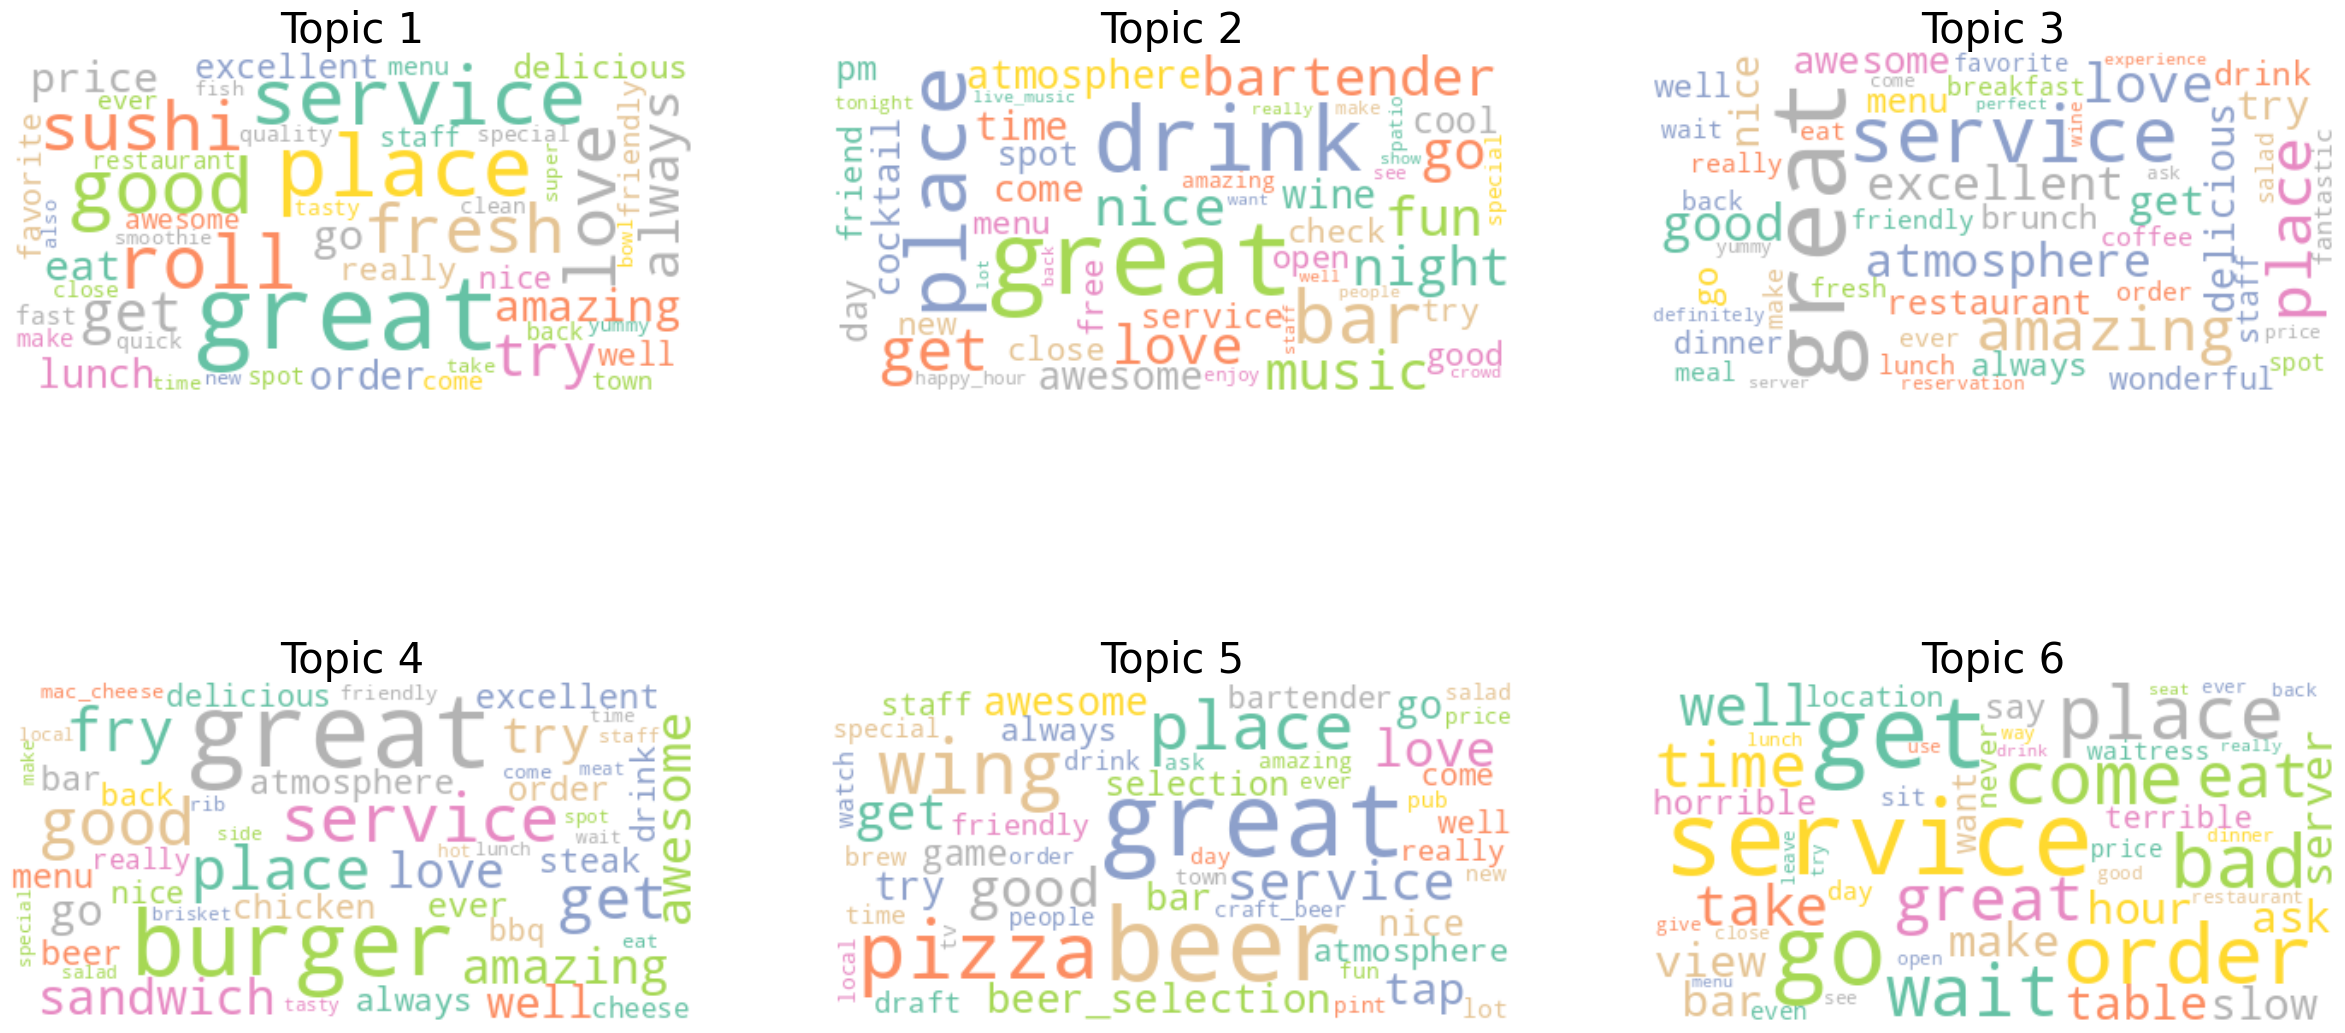

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()

wcloud = wordcloud.WordCloud(background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')

fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")

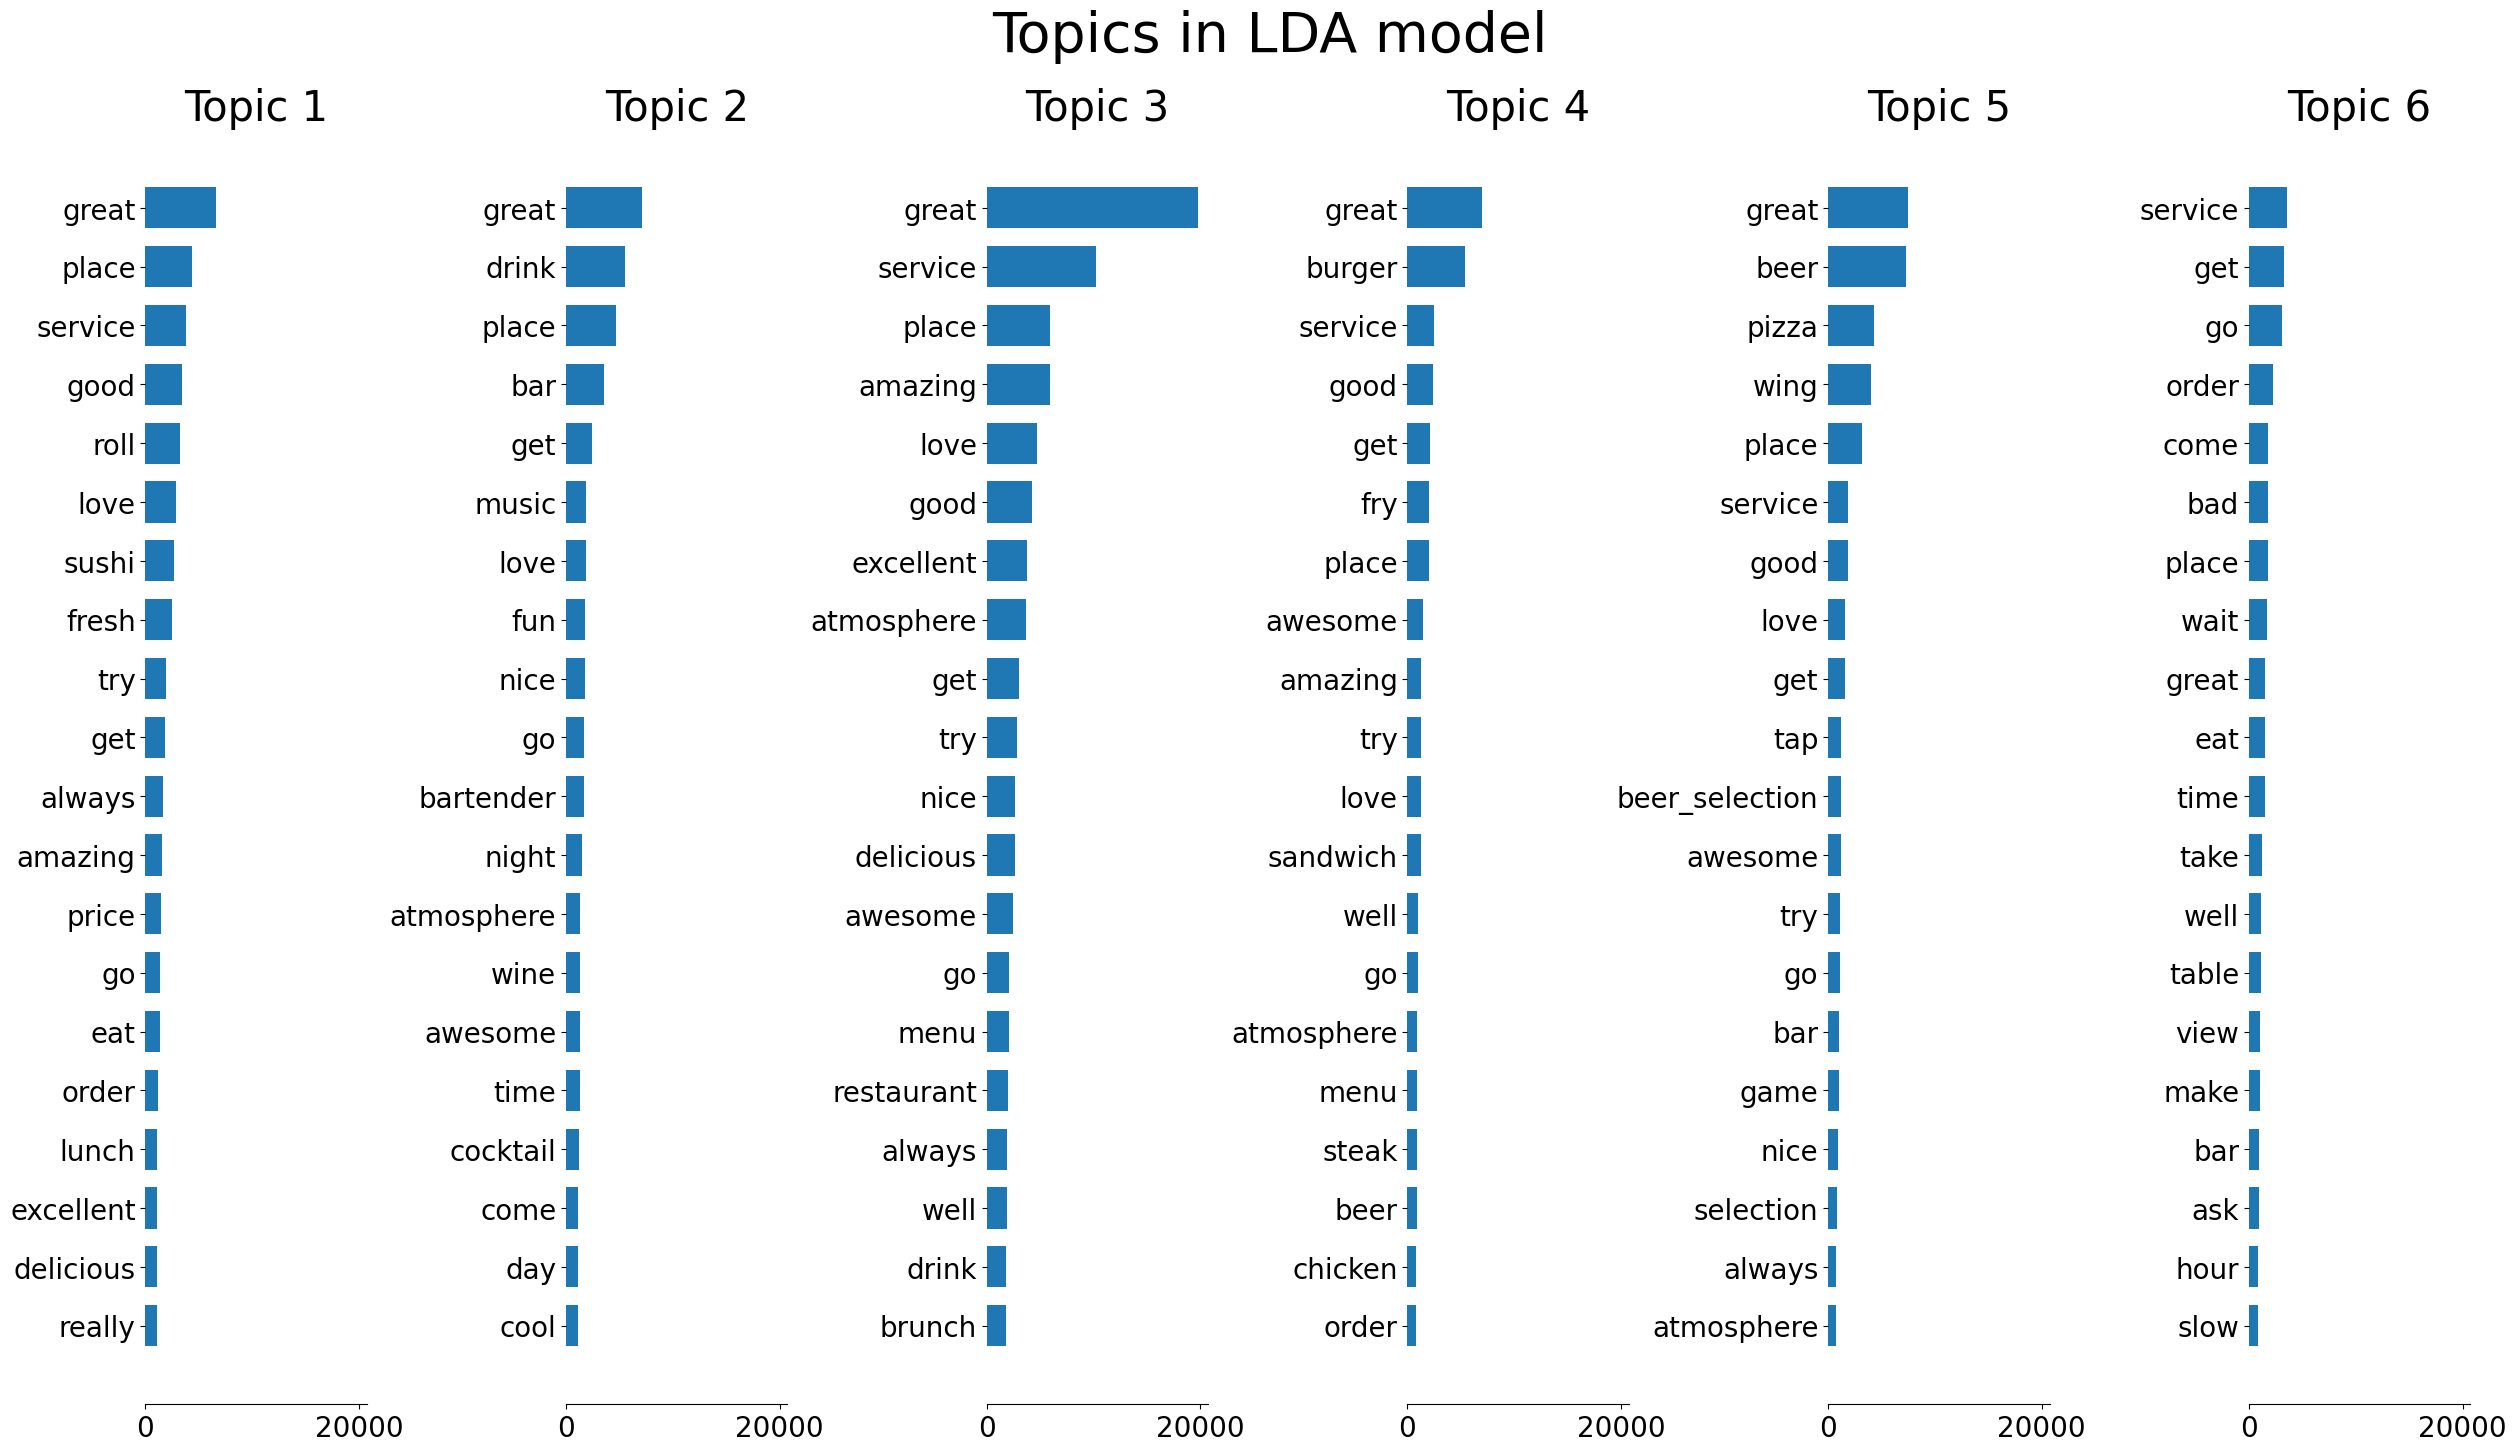

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 6, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

In [ ]:
# drop data with missing values in the 'content' column (target_column)
df = df.dropna(subset=[target_column])

In [ ]:
# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

In [ ]:
# remove contraction
!pip install contractions
import contractions
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

In [ ]:
import re


# Remove new line characters ("/n")

df[target_column] = df[target_column].map(lambda x: re.sub('\s+', ' ', x))

# Remove url link
df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))

# Remove email address
df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emoji
# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Then remove the emoji
df[target_column] = df[target_column].map(lambda x: re.sub(emoj, ' ', x))

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

In [ ]:
import string
df[target_column] = df[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# create a list of the reviews from the 'Review' column
words = df[target_column].tolist()

# tokenise the words
from nltk.tokenize import word_tokenize

word_tokens = [] # create an empty list to put the tokenised words
for review in words:
    word_tokens.append(word_tokenize(review))

word_tokens[0]

['come', 'for', 'the', 'local', 'wines', 'on', 'tap', 'and', 'live', 'jazz']

In [ ]:
# Start dealing with stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
# use English stopwords
stopwords = stopwords.words("english")
# you can also extend the stopwords list with more words that you want to remove
stopwords.extend([''])

# create a new list with stop words removed
tokens_without_stopwords = []
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stopwords])

tokens_without_stopwords[0]

['come', 'local', 'wines', 'tap', 'live', 'jazz']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed = []
for review in tokens_without_stopwords:
    stemmed.append([ps.stem(w) for w in review])

stemmed[0]

['come', 'local', 'wine', 'tap', 'live', 'jazz']

In [ ]:
# put the tokens back together as text after stemming
import string
rejoin = []
for review in stemmed:
    x = " ".join(review) # join the text back together
    # remove punctuation from the reviews using the string package
    rejoin.append(x)

# add the reformed text to the data frame
df['filtered_review'] = rejoin

In [ ]:
# Before running the module, we need to download some packages and list of tags available in nltk
nltk.download('tagsets')
print(nltk.help.upenn_tagset())

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

True

In [ ]:
from nltk import pos_tag, RegexpParser

# Here we define the tags for each word in the token list
tags = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    tags.append(pos_tag(word_tokens[i]))

tags[0]

[('come', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('local', 'JJ'),
 ('wines', 'NNS'),
 ('on', 'IN'),
 ('tap', 'NN'),
 ('and', 'CC'),
 ('live', 'JJ'),
 ('jazz', 'NN')]

In [ ]:
# Here we extract the nouns from the tokens, added to list
noun = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    noun.append([word for word,pos in pos_tag(word_tokens[i]) if pos.startswith('N')])

noun[0]

['come', 'wines', 'tap', 'jazz']

In [ ]:
# Here we extract the adjective from the tokens, added to list
adj = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    adj.append([word for word,pos in pos_tag(word_tokens[i]) if pos == 'JJ'])

adj[0]

['local', 'live']

In [ ]:
# We can use the same process to creat document term matrix by considering the importance of the words
# Here we will use TfidfVectorizer() from scikit-learn to convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# set vectorizer - CountVectorizer for word counts
tfidfvectorizer = TfidfVectorizer(stop_words='english')

# create an array of word counts
vec = tfidfvectorizer.fit_transform(df.filtered_review)

# convert this to a dataframe
df2 = pd.DataFrame(vec.toarray(), columns=tfidfvectorizer.get_feature_names_out())

# set a threshold to drop infrequent words
threshold = 0.01

# drop words based on the threshold
df2 = df2.drop(df2.mean()[df2.mean() < threshold].index.values, axis=1) # Here find out the word with average word score lower than 0.001 and drop them

# join the two datasets together
tfidf = df.join(df2, how='left',lsuffix='_left', rsuffix='_right')

In [ ]:
tfidf.to_csv('tfidf.csv',index=False)

In [ ]:
df2.mean()

alway        0.017651
amaz         0.027741
ask          0.010997
atmospher    0.021681
awesom       0.025229
               ...   
time         0.021563
tri          0.023927
wait         0.013948
wine         0.012972
wing         0.020907
Length: 72, dtype: float64

In [ ]:
mean_series = df2.mean()

# 转换成 DataFrame
mean_df = pd.DataFrame(mean_series, columns=['Mean'])

# 如果你想要列名作为一个单独的列而不是索引
mean_df.reset_index(inplace=True)
mean_df.rename(columns={'index': 'Feature'}, inplace=True)

mean_df

,Feature,Mean
0,alway,0.017651
1,amaz,0.027741
2,ask,0.010997
3,atmospher,0.021681
4,awesom,0.025229
...,...,...
67,time,0.021563
68,tri,0.023927
69,wait,0.013948
70,wine,0.012972


In [ ]:
mean_df.to_csv('importance_bar.csv', index=False)